In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import gdown

In [ ]:
# Download the Messages.db file from Google Drive
file_id_messages = '1XBSeL6yuW_IOgRnm2FNr0B9FSVxj0Llv' 
messages_url = f'https://drive.google.com/uc?id={file_id_messages}'
output_messages = 'Messages.db'
gdown.download(messages_url, output_messages, quiet=False)

conn = sqlite3.connect(output_messages) 
messages = pd.read_sql_query("SELECT * FROM messages", conn)
conn.close()

# Overview of Data

In [3]:
print("Dataset Overview:")
print(messages.info())

print("Missing Values:")
print(messages.isnull().sum())

print("Duplicate Rows:")
duplicate_count = messages.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

print("Descriptive Statistics:")
print(messages.describe(include='all'))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20583769 entries, 0 to 20583768
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   message_id       object
 1   campaign_id      int64 
 2   message_type     object
 3   client_id        int64 
 4   channel          object
 5   stream           object
 6   date             object
 7   sent_at          object
 8   is_opened        int64 
 9   is_clicked       int64 
 10  is_unsubscribed  int64 
 11  is_complained    int64 
 12  is_blocked       int64 
 13  is_purchased     int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ GB
None
Missing Values:
message_id             0
campaign_id            0
message_type           0
client_id              0
channel                0
stream                 0
date               36122
sent_at            36122
is_opened              0
is_clicked             0
is_unsubscribed        0
is_complained          0
is_blocked             0
is_purc

# User engagement metrics

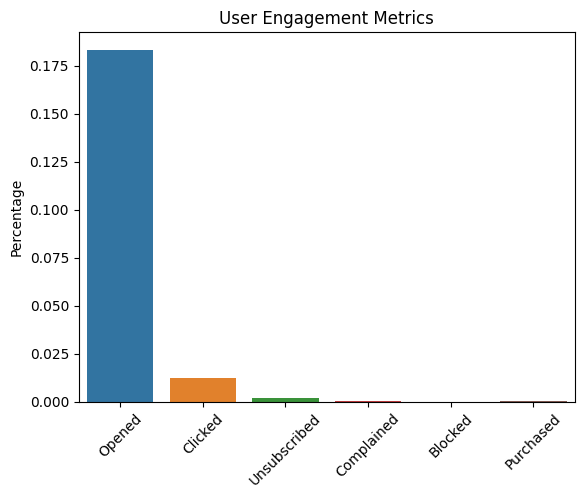

In [3]:
engagement_metrics = {
    'Opened': messages['is_opened'].mean(),
    'Clicked': messages['is_clicked'].mean(),
    'Unsubscribed': messages['is_unsubscribed'].mean(),
    'Complained': messages['is_complained'].mean(),
    'Blocked': messages['is_blocked'].mean(),
    'Purchased': messages['is_purchased'].mean()
}
sns.barplot(x=list(engagement_metrics.keys()), y=list(engagement_metrics.values()))
plt.title('User Engagement Metrics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [4]:
engagement_metrics = {
    'Opened': messages['is_opened'].mean() * 100, 
    'Clicked': messages['is_clicked'].mean() * 100,
    'Unsubscribed': messages['is_unsubscribed'].mean() * 100,
    'Complained': messages['is_complained'].mean() * 100,
    'Blocked': messages['is_blocked'].mean() * 100,
    'Purchased': messages['is_purchased'].mean() * 100
}

for metric, value in engagement_metrics.items():
    print(f"{metric}: {value:.2f}%")



Opened: 18.33%
Clicked: 1.22%
Unsubscribed: 0.18%
Complained: 0.02%
Blocked: 0.00%
Purchased: 0.03%


# Correlation between engagement metrics 

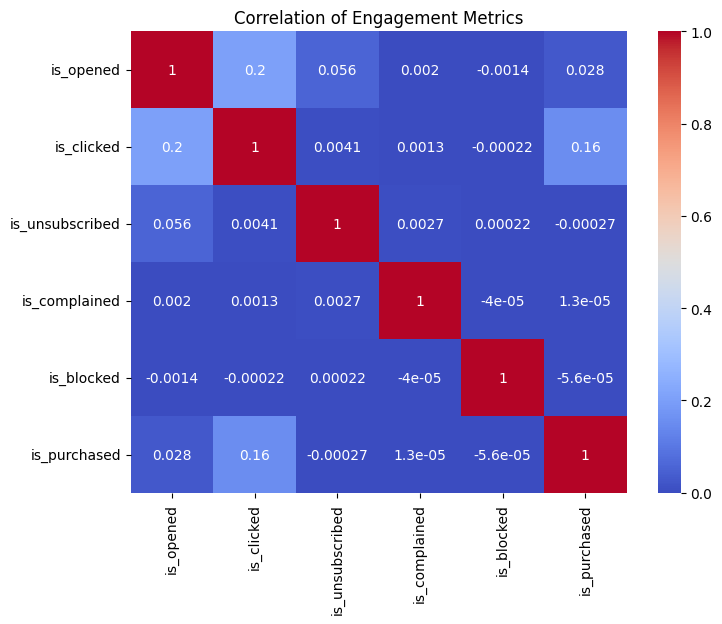

In [5]:
plt.figure(figsize=(8, 6))
corr = messages[['is_opened', 'is_clicked', 'is_unsubscribed', 'is_complained', 'is_blocked', 'is_purchased']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Engagement Metrics')
plt.show()

# Distribution of Messages Types 

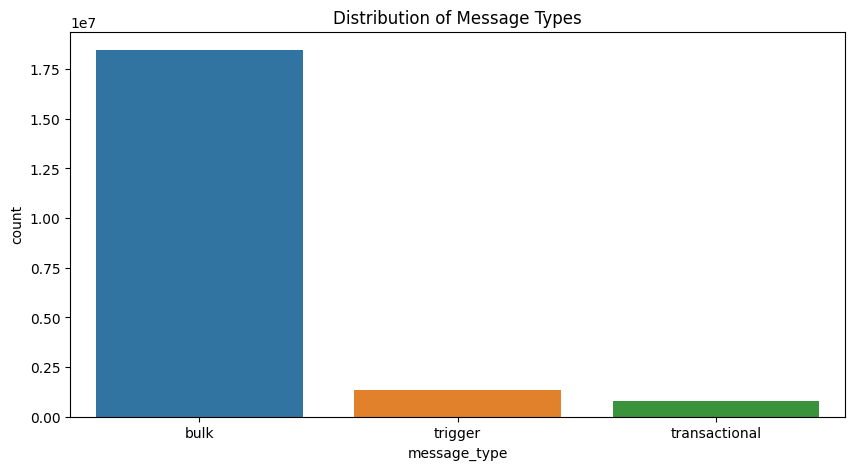

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=messages, x='message_type')
plt.title('Distribution of Message Types')
plt.show()

# Analyze Message Type by Channel 

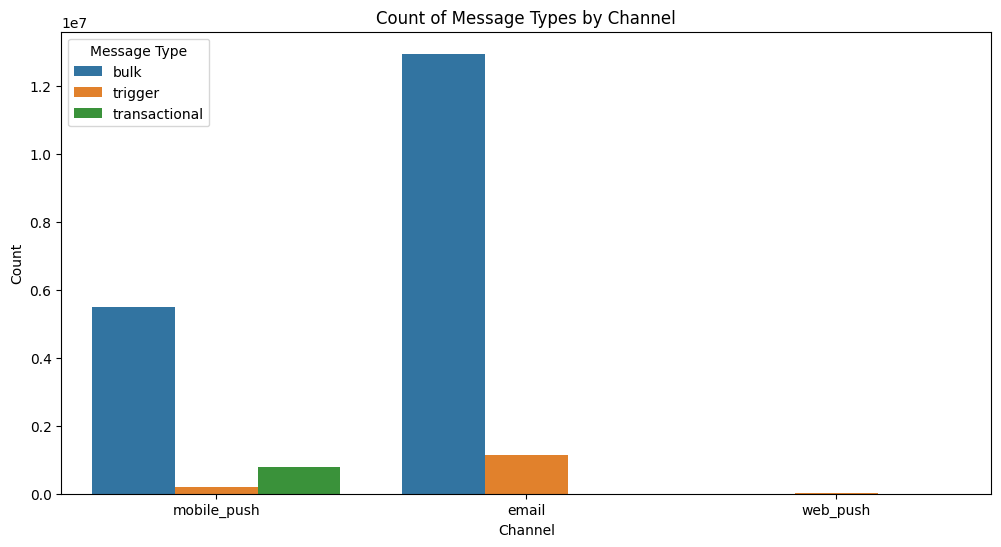

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=messages, x='channel', hue='message_type')
plt.title('Count of Message Types by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend(title='Message Type')
plt.show()

# Open Rate by Channel and Message Type

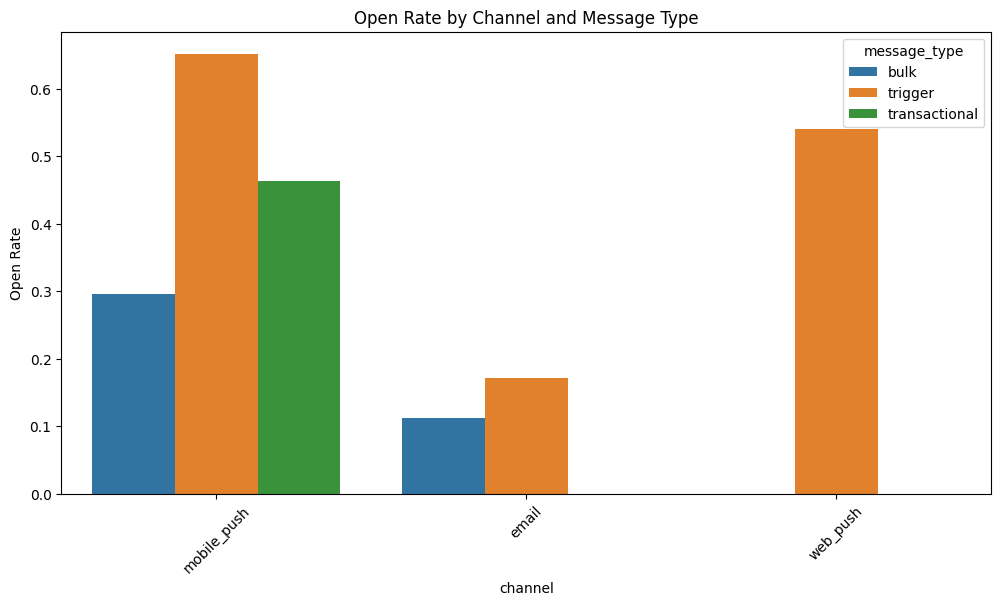

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(data=messages, x='channel', y='is_opened', hue='message_type', 
            estimator=lambda x: sum(x) / len(x), ci=None)
plt.title('Open Rate by Channel and Message Type')
plt.ylabel('Open Rate')
plt.xticks(rotation=45)
plt.show()


# Click Rate by Channel and Message Type

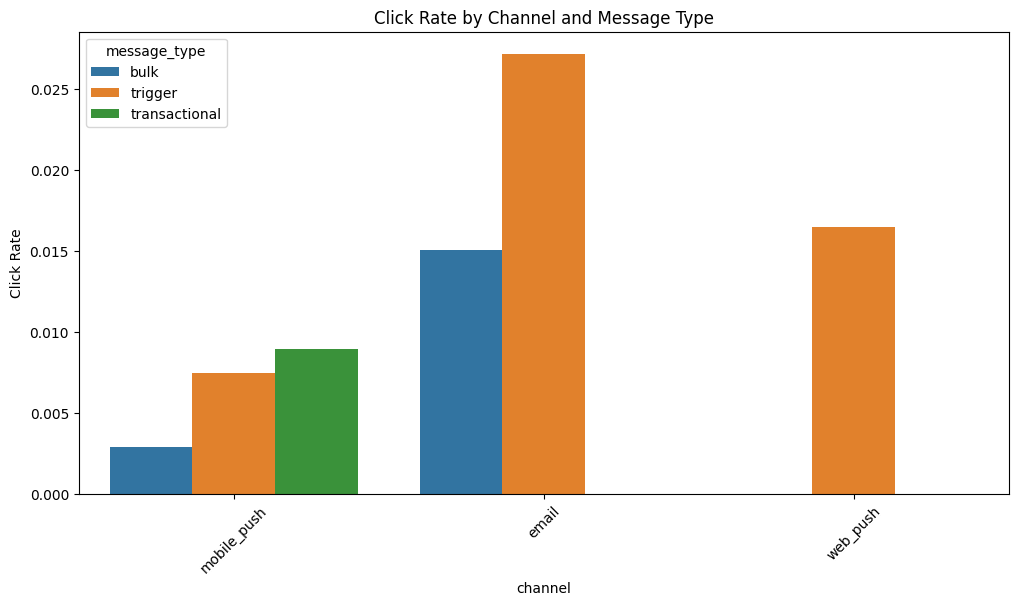

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=messages, x='channel', y='is_clicked', hue='message_type', 
            estimator=lambda x: sum(x) / len(x), ci=None)
plt.title('Click Rate by Channel and Message Type')
plt.ylabel('Click Rate')
plt.xticks(rotation=45)
plt.show()


# Purchase Rate by Channel and Message Type 

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=messages, x='channel', y='is_purchased', hue='message_type', estimator=lambda x: sum(x) / len(x), ci=None)
plt.title('Purchase Rate by Channel and Message Type')
plt.ylabel('Purchase Rate')
plt.xlabel('Channel')
plt.xticks(rotation=45)
plt.legend(title='Message Type')
plt.show()

# Impact of Message Timings

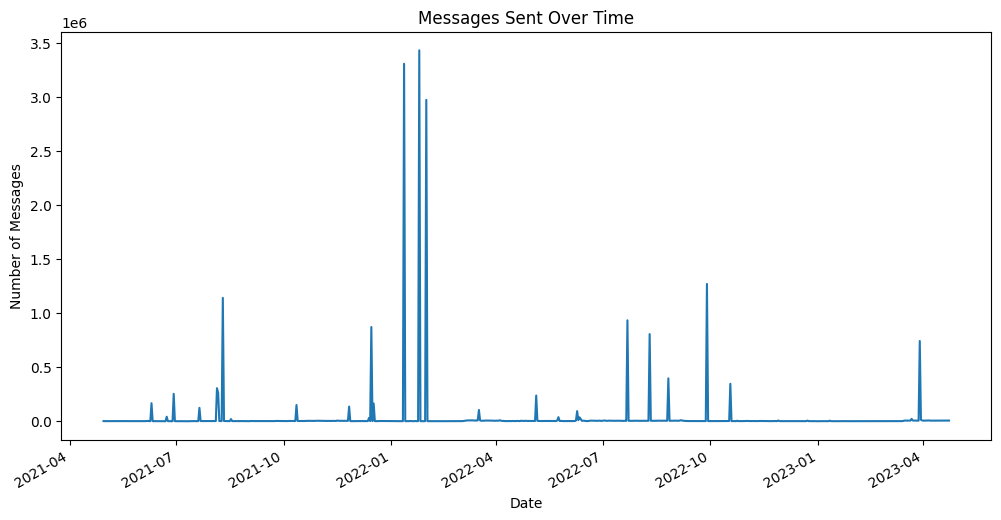

In [10]:
messages['date'] = pd.to_datetime(messages['date'])
messages.groupby('date').size().plot(figsize=(12, 6))
plt.title('Messages Sent Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

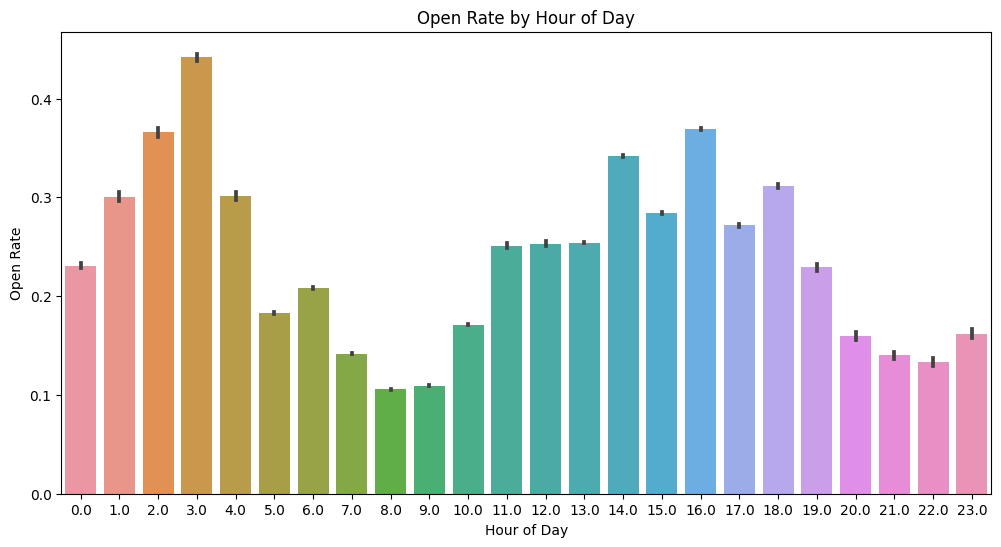

In [11]:
messages['sent_at'] = pd.to_datetime(messages['sent_at'])
messages['hour'] = messages['sent_at'].dt.hour
plt.figure(figsize=(12, 6))
sns.barplot(data=messages, x='hour', y='is_opened', estimator=lambda x: sum(x) / len(x))
plt.title('Open Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Open Rate')
plt.show()


# Message Performance by Device 

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(data=messages, x='stream', y='is_opened', estimator=lambda x: sum(x) / len(x))
plt.title('Open Rate by Device Type')
plt.ylabel('Open Rate')
plt.show()

# Purchase Rate by Channel and Type 

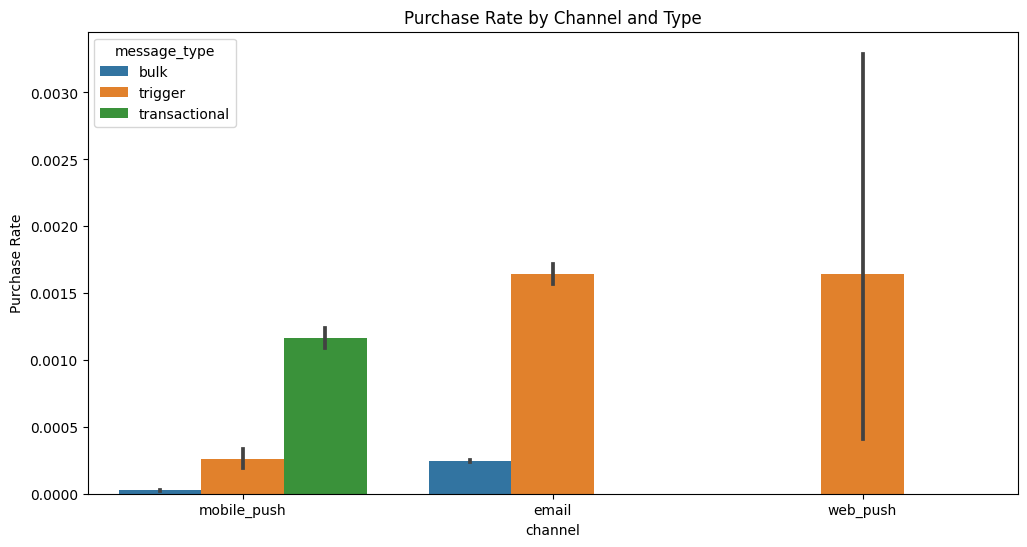

In [ ]:
plt.figure(figsize=(12, 6)) 
sns.barplot(data=messages, x='channel', y='is_purchased', hue='message_type', estimator=lambda x: sum(x) / len(x))
plt.title('Purchase Rate by Channel and Type')
plt.ylabel('Purchase Rate')
plt.show()


# Identify Patterns for Negative Outcomes 

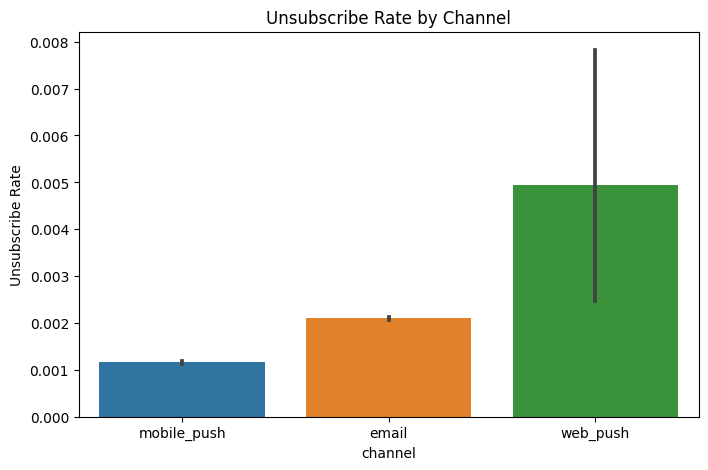

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=messages, x='channel', y='is_unsubscribed')
plt.title('Unsubscribe Rate by Channel')
plt.ylabel('Unsubscribe Rate')
plt.show()
